In [1]:
# when Tap key is not working...
%config Completer.use_jedi = False

In [2]:
df = pd.read_csv('./train_rev.csv', index_col=[0])
df.tail(3)

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,day
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Monday
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Monday
415422,415422,2019-09-30,32820000,시내,6115100,서귀포시외버스터미널,33.24873,126.50799,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Monday


## 가정1. 
    모든 버스 노선 613개는 매일 운행되고, 매일 같은 정류장에 정차할 것이다.

## WRONG

#### 9월 전체 운행정보
    - riding data : 415,423건
    - station : 3,563역
    - bus_route : 613코스
        
        9월 1일 운행정보
            - riding data : 11,538건
            - station : 2,552역
            - bus_route : 496코스

#### 버스 노선이 총 613개지만, full-operated된 날은 없었음.
    - 요일별로 운행하는 노선이 달라지거나, 해당 data가 없다. (i.e 현금 결제 )

#### 버스 노선이 full-operated된 날이 없으므로 당연히 3,563역에 다 stop-by 하는날은 없었음.

In [3]:
df.groupby(['date']).count()

,id,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,day
date,,,,,,,,,,,,,,,,,,,,,
2019-09-01,11538,11538,11538,11538,11538,11538,11538,11538,11538,11538,...,11538,11538,11538,11538,11538,11538,11538,11538,11538,11538
2019-09-02,14960,14960,14960,14960,14960,14960,14960,14960,14960,14960,...,14960,14960,14960,14960,14960,14960,14960,14960,14960,14960
2019-09-03,15485,15485,15485,15485,15485,15485,15485,15485,15485,15485,...,15485,15485,15485,15485,15485,15485,15485,15485,15485,15485
2019-09-04,14739,14739,14739,14739,14739,14739,14739,14739,14739,14739,...,14739,14739,14739,14739,14739,14739,14739,14739,14739,14739
2019-09-05,15706,15706,15706,15706,15706,15706,15706,15706,15706,15706,...,15706,15706,15706,15706,15706,15706,15706,15706,15706,15706
2019-09-06,15352,15352,15352,15352,15352,15352,15352,15352,15352,15352,...,15352,15352,15352,15352,15352,15352,15352,15352,15352,15352
2019-09-07,10198,10198,10198,10198,10198,10198,10198,10198,10198,10198,...,10198,10198,10198,10198,10198,10198,10198,10198,10198,10198
2019-09-08,11582,11582,11582,11582,11582,11582,11582,11582,11582,11582,...,11582,11582,11582,11582,11582,11582,11582,11582,11582,11582
2019-09-09,15297,15297,15297,15297,15297,15297,15297,15297,15297,15297,...,15297,15297,15297,15297,15297,15297,15297,15297,15297,15297


In [3]:
date_only = df['date'].unique()
date_only

array(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
       '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
       '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12',
       '2019-09-13', '2019-09-14', '2019-09-15', '2019-09-16',
       '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
       '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24',
       '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
       '2019-09-29', '2019-09-30'], dtype=object)

In [4]:
bus_route_only = pd.DataFrame({'bus_route': [len(df[df['date']=='2019-09-01']['bus_route_id'].value_counts()), 
                            len(df[df['date']=='2019-09-02']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-03']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-04']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-05']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-06']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-07']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-08']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-09']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-10']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-11']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-12']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-13']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-14']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-15']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-16']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-17']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-18']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-19']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-20']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-21']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-22']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-23']['bus_route_id'].value_counts()),
                           len(df[df['date']=='2019-09-24']['bus_route_id'].value_counts()),
                            len(df[df['date']=='2019-09-25']['bus_route_id'].value_counts()),
                            len(df[df['date']=='2019-09-26']['bus_route_id'].value_counts()),
                            len(df[df['date']=='2019-09-27']['bus_route_id'].value_counts()),
                            len(df[df['date']=='2019-09-28']['bus_route_id'].value_counts()),
                            len(df[df['date']=='2019-09-29']['bus_route_id'].value_counts()),
                            len(df[df['date']=='2019-09-30']['bus_route_id'].value_counts())                            
                           ]}).set_index(date_only)

In [5]:
station_only = pd.DataFrame({'station': [len(df[df['date']=='2019-09-01']['station_code'].value_counts()), 
                            len(df[df['date']=='2019-09-02']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-03']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-04']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-05']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-06']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-07']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-08']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-09']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-10']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-11']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-12']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-13']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-14']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-15']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-16']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-17']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-18']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-19']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-20']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-21']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-22']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-23']['station_code'].value_counts()),
                           len(df[df['date']=='2019-09-24']['station_code'].value_counts()),
                            len(df[df['date']=='2019-09-25']['station_code'].value_counts()),
                            len(df[df['date']=='2019-09-26']['station_code'].value_counts()),
                            len(df[df['date']=='2019-09-27']['station_code'].value_counts()),
                            len(df[df['date']=='2019-09-28']['station_code'].value_counts()),
                            len(df[df['date']=='2019-09-29']['station_code'].value_counts()),
                            len(df[df['date']=='2019-09-30']['station_code'].value_counts())                            
                           ]}).set_index(date_only)

In [6]:
station_only

,station
2019-09-01,2552
2019-09-02,2750
2019-09-03,2862
2019-09-04,2762
2019-09-05,2877
2019-09-06,2838
2019-09-07,2346
2019-09-08,2518
2019-09-09,2797
2019-09-10,2886


In [7]:
bus_route_only

,bus_route
2019-09-01,496
2019-09-02,534
2019-09-03,545
2019-09-04,540
2019-09-05,538
2019-09-06,537
2019-09-07,480
2019-09-08,502
2019-09-09,542
2019-09-10,541


In [8]:
# 일자별 운행된 노선갯수, 정차한 역 갯수
route_station = pd.concat([bus_route_only, station_only], axis=1)
route_station

,bus_route,station
2019-09-01,496,2552
2019-09-02,534,2750
2019-09-03,545,2862
2019-09-04,540,2762
2019-09-05,538,2877
2019-09-06,537,2838
2019-09-07,480,2346
2019-09-08,502,2518
2019-09-09,542,2797
2019-09-10,541,2886


## 가정2. 
    운행된 노선 갯수가 가장 작은 날은 추석 연휴일 것이다.

## WRONG

#### 운행 노선 갯수
    - MAX : 9월 27일(금) ; 546개 - 정류장 갯수는? 2846개 (ABOVE MEDIAN)
    - MIN : 9월 22일(일) ; 429개 -- 정류장 갯수 MIN과 일치
    
#### stop-by 정류장 갯수
    - MAX : 9월 26일(목) ; 2901개 -- 운행 노선 갯수는? 534개 (ABOVE MEAN, BELOW MEDIAN)
    - MIN : 9월 22일(일) ; 1690개 -- 운행 노선 갯수 MIN과 일치
    
##### WHY? 
    9월 22일(일) 태풍 상륙
    
    
#### 추석 연휴 기간 운행 노선, 정류장 갯수
    - 9월 12일(목) 501개, 2522개 
    - 9월 13일(금) 481개, 2184개 
    - 9월 14일(토) 496개, 2450개
    - 9월 15일(일) 489개, 2490개
        ; 모두 BELOW MEAN

#### 운행 노선 갯수, 정류장 갯수 모두 평균보다 중위값이 더 크다.
#### 큰 값으로 더 쏠렸다는 의미.
#### 데이터가 대칭일때는 보통, 중위값과 평균이 비슷한 곳에 위치

<AxesSubplot:xlabel='bus_route', ylabel='Density'>

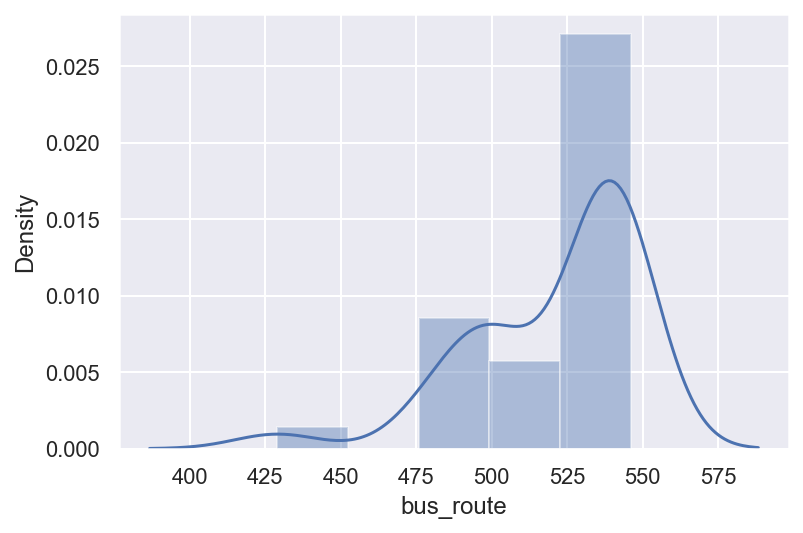

In [9]:
# 일자별 운행된 노선갯수 분포
sns.distplot(route_station["bus_route"])
# 뾰족한 곡선의 끝부분은 최빈값.

<AxesSubplot:xlabel='bus_route', ylabel='Density'>

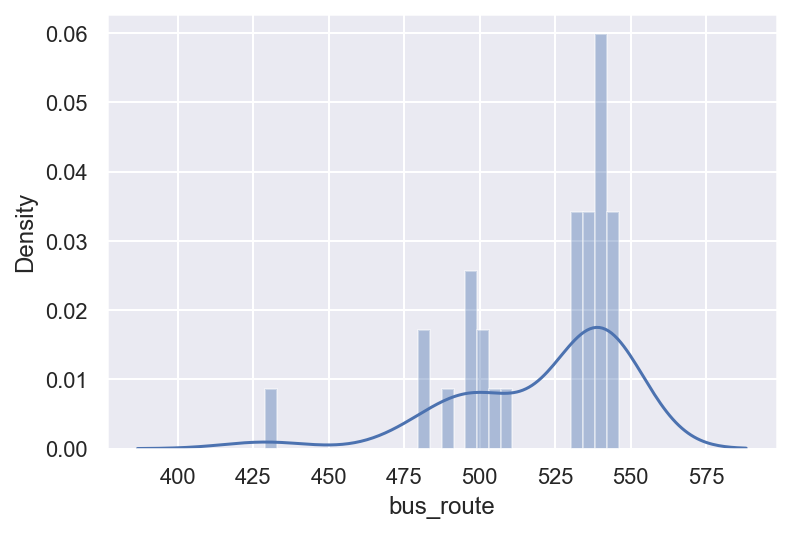

In [51]:
# 일자별 운행된 노선갯수 분포
sns.distplot(route_station["bus_route"],bins=30)
# 뾰족한 곡선의 끝부분은 최빈값.

In [15]:
route_station

,bus_route,station
2019-09-01,496,2552
2019-09-02,534,2750
2019-09-03,545,2862
2019-09-04,540,2762
2019-09-05,538,2877
2019-09-06,537,2838
2019-09-07,480,2346
2019-09-08,502,2518
2019-09-09,542,2797
2019-09-10,541,2886


<AxesSubplot:xlabel='station', ylabel='Density'>

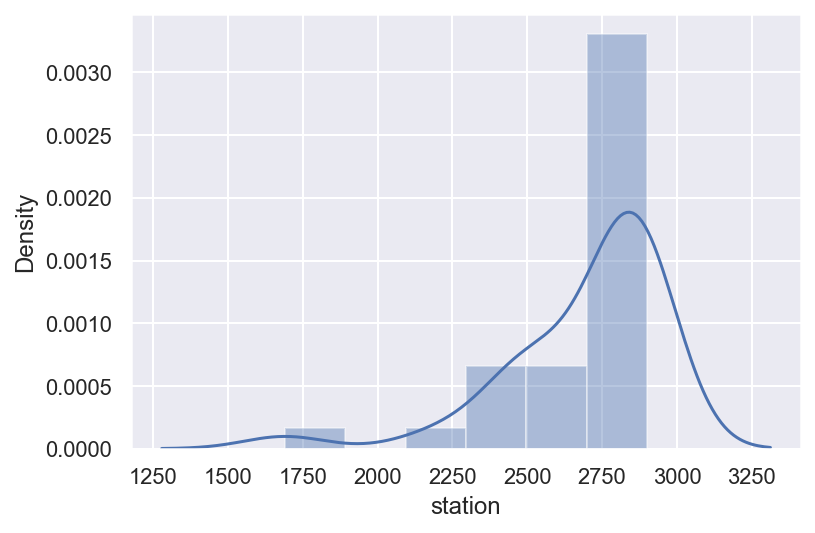

In [14]:
# 일자별 정차한 역 갯수 분포
sns.distplot(route_station["station"], color='b')

<AxesSubplot:xlabel='station', ylabel='Count'>

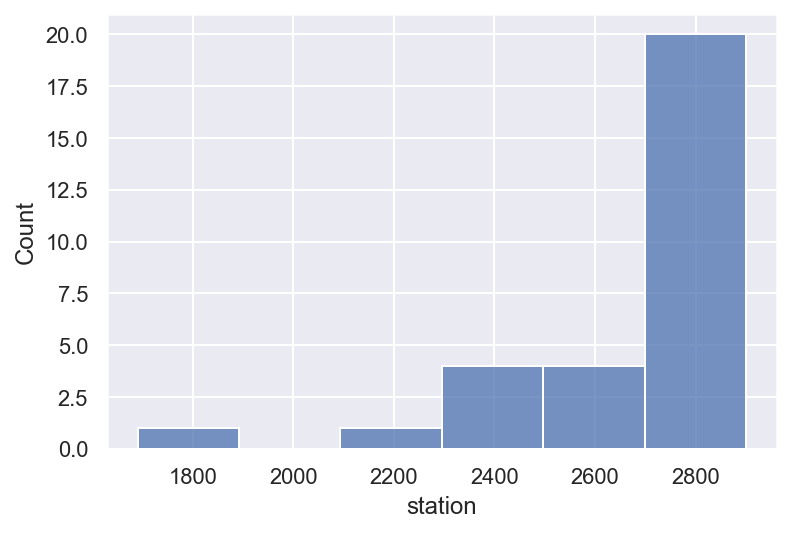

In [16]:
sns.histplot(route_station["station"], color='b')

<AxesSubplot:xlabel='station', ylabel='Count'>

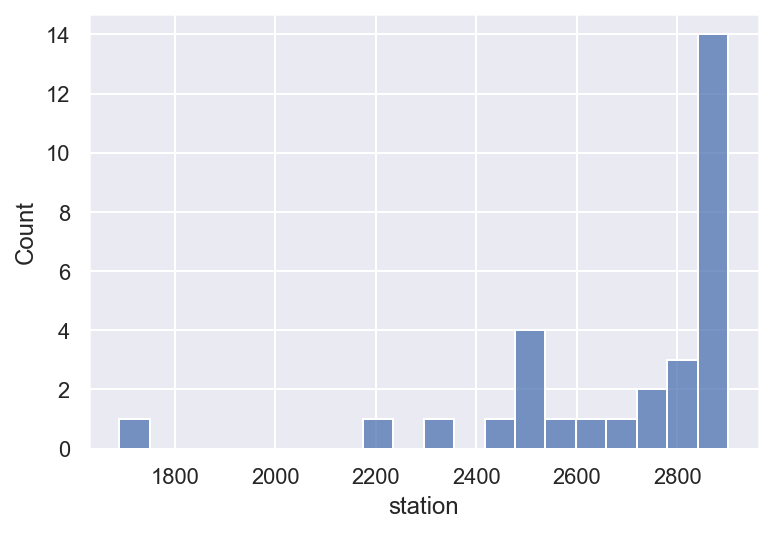

In [21]:
sns.histplot(route_station["station"], color='b', bins=20)

<AxesSubplot:xlabel='station', ylabel='Count'>

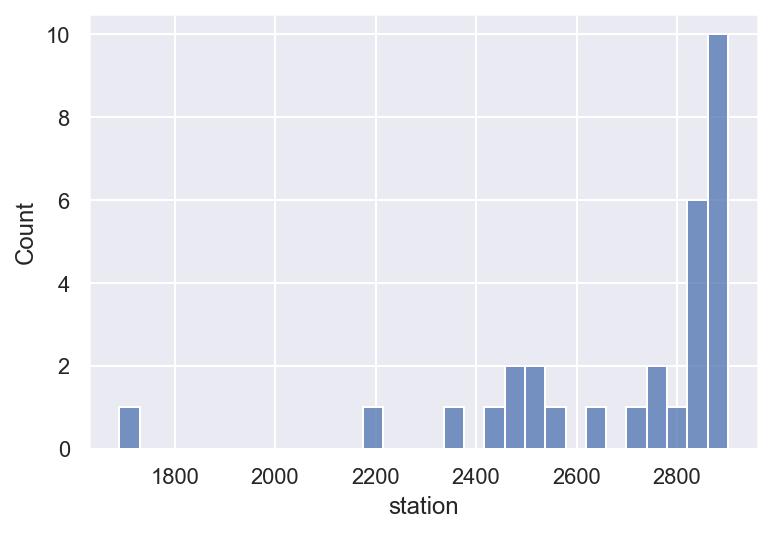

In [20]:
sns.histplot(route_station["station"], color='b', bins=30)

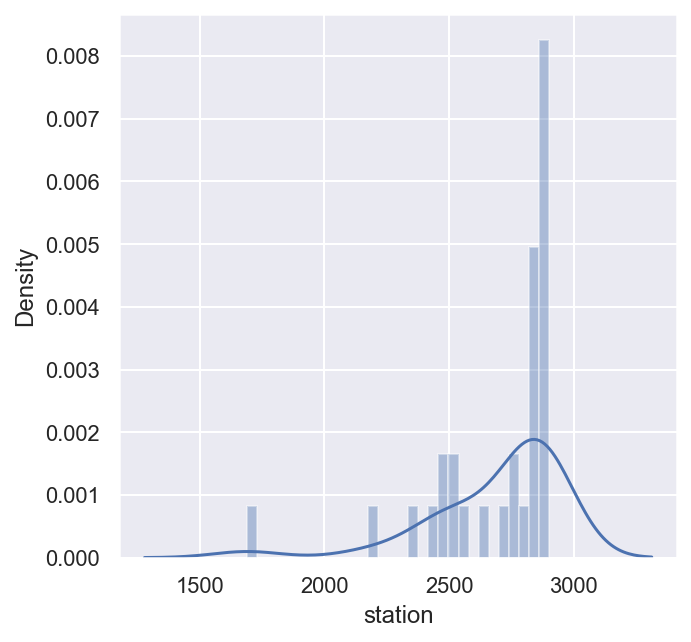

In [23]:
# 일자별 정차한 역 갯수 히스토그램
plt.figure(figsize=(5,5))
sns.distplot(route_station["station"],bins=30,kde=True)
plt.show()

In [10]:
X_train_over = route_station

from sklearn.preprocessing import MinMaxScaler
# X_train 먼저 fit후 trasnform
scaler = MinMaxScaler().fit(X_train_over)
X_train_over = scaler.transform(X_train_over)

In [11]:
X_train_over

array([[0.57264957, 0.71180842],
       [0.8974359 , 0.87530966],
       [0.99145299, 0.96779521],
       [0.94871795, 0.88521883],
       [0.93162393, 0.98018167],
       [0.92307692, 0.94797688],
       [0.43589744, 0.54170107],
       [0.62393162, 0.68373245],
       [0.96581197, 0.91412056],
       [0.95726496, 0.98761354],
       [0.92307692, 0.94797688],
       [0.61538462, 0.68703551],
       [0.44444444, 0.40792733],
       [0.57264957, 0.62758051],
       [0.51282051, 0.66061107],
       [0.8974359 , 0.96366639],
       [0.99145299, 0.96614368],
       [0.94871795, 0.9793559 ],
       [0.97435897, 0.96696945],
       [0.93162393, 0.98596201],
       [0.58974359, 0.65730801],
       [0.        , 0.        ],
       [0.94017094, 0.96531792],
       [0.96581197, 0.99917424],
       [0.96581197, 0.96944674],
       [0.8974359 , 1.        ],
       [1.        , 0.95458299],
       [0.68376068, 0.84393064],
       [0.65811966, 0.78034682],
       [0.88888889, 0.98265896]])

In [12]:
X_train_over = pd.DataFrame(X_train_over, columns=['bus_route', 'station'], index=route_station.index)
X_train_over

,bus_route,station
2019-09-01,0.572650,0.711808
2019-09-02,0.897436,0.875310
2019-09-03,0.991453,0.967795
2019-09-04,0.948718,0.885219
2019-09-05,0.931624,0.980182
2019-09-06,0.923077,0.947977
2019-09-07,0.435897,0.541701
2019-09-08,0.623932,0.683732
2019-09-09,0.965812,0.914121
2019-09-10,0.957265,0.987614


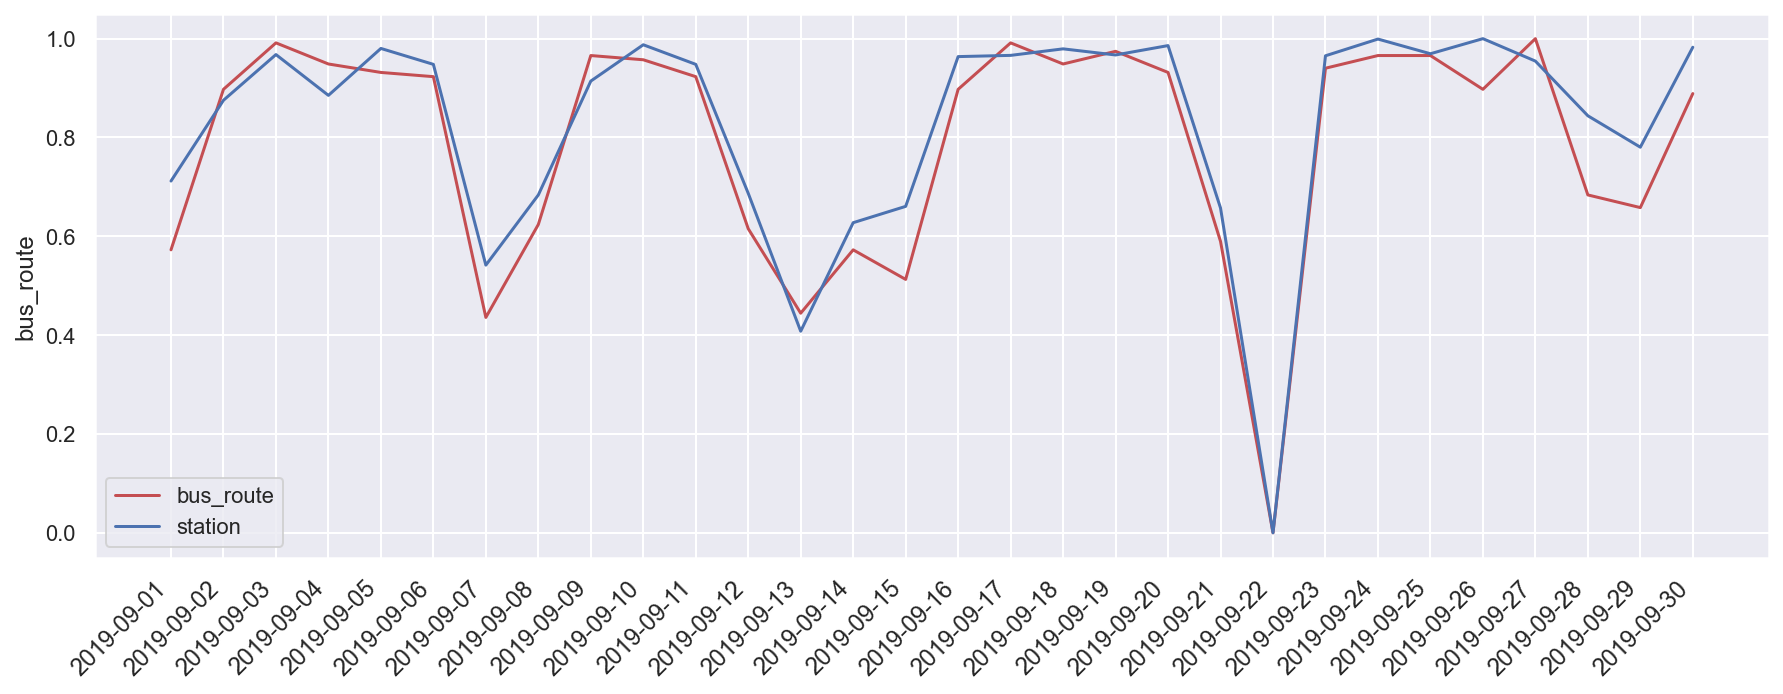

In [13]:
# MINMAX Scaling후
# 일자별 운행된 unique노선 갯수, 정차한 unique역 갯수
f, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=X_train_over, x=X_train_over.index,  y="bus_route", color='r', label='bus_route')
sns.lineplot(data=X_train_over, x=X_train_over.index, y="station", color='b', label='station')
plt.xticks(rotation=45, horizontalalignment='right', fontsize='medium')
plt.show
# FYI, 9월 1일 : 일요일

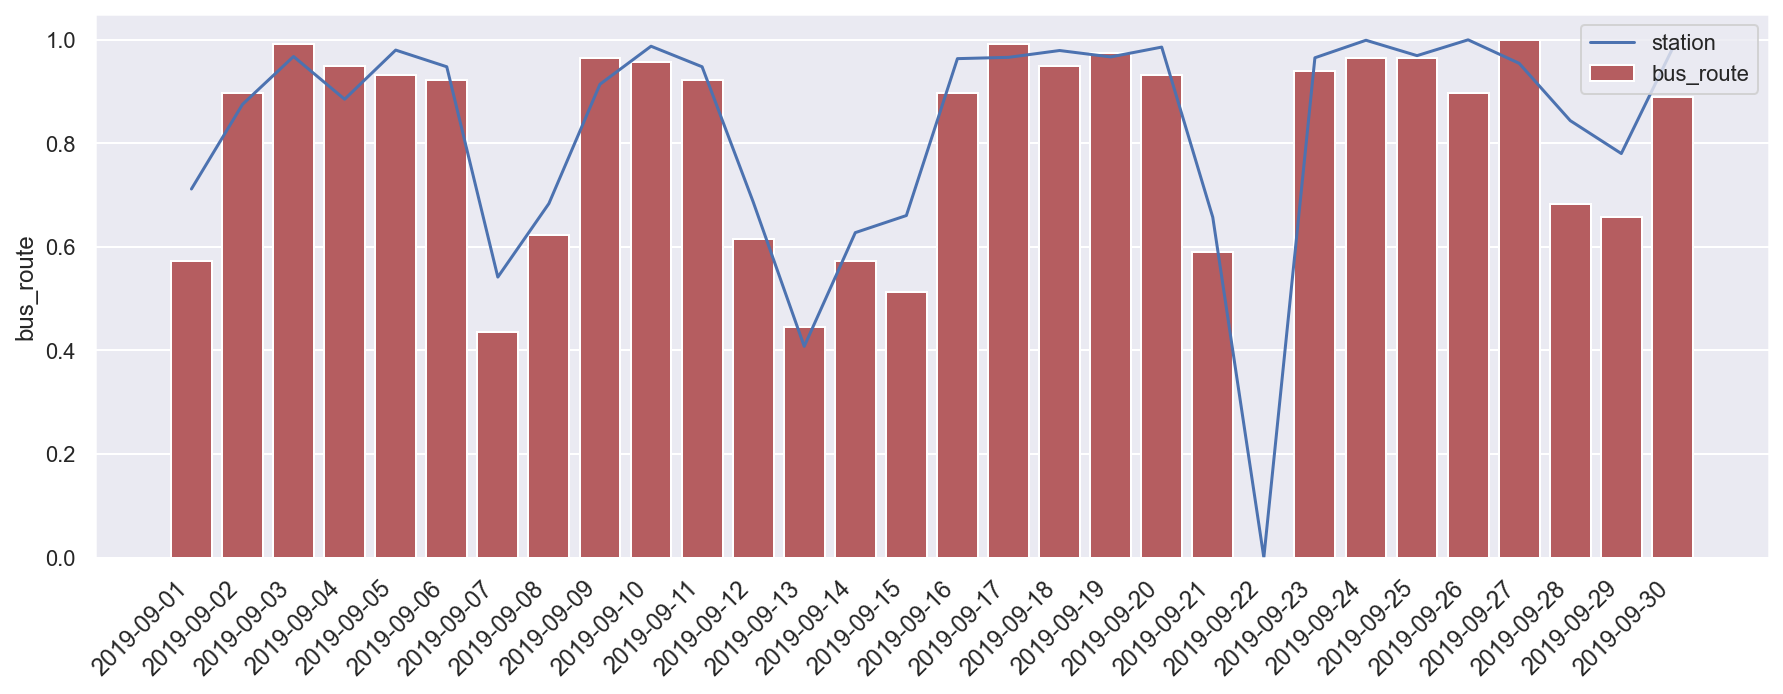

In [93]:
# MINMAX Scaling후
# 일자별 운행된 unique노선 갯수, 정차한 unique역 갯수
f, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=X_train_over, x=X_train_over.index,  y="bus_route", color='r', label='bus_route')
sns.lineplot(data=X_train_over, x=X_train_over.index, y="station", color='b', label='station')
plt.xticks(rotation=45, horizontalalignment='right', fontsize='medium')
plt.show()

<AxesSubplot:ylabel='bus_route'>

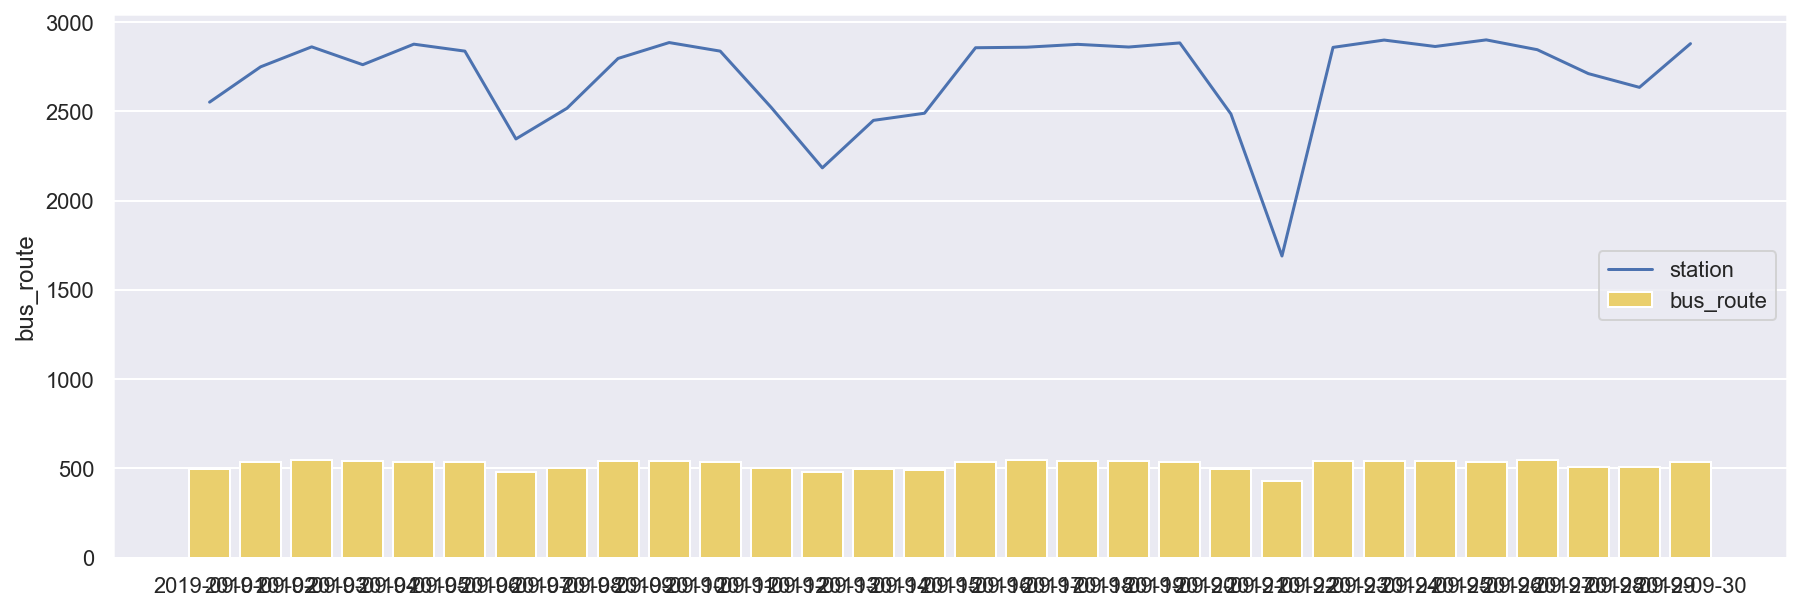

In [90]:
# 일자별 운행된 unique노선 갯수, 정차한 unique역 갯수
f, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=route_station, x=route_station.index, y="bus_route", color='#ffdb58', label='bus_route')
sns.lineplot(data=route_station, x=route_station.index, y="station", color='b', label='station')

In [26]:
route_station.describe()

,bus_route,station
count,30.000000,30.000000
mean,521.233333,2692.766667
std,27.821702,270.815204
min,429.000000,1690.000000
25%,501.250000,2529.500000
50%,535.500000,2838.000000
75%,540.750000,2863.500000
max,546.000000,2901.000000


#### bus_route_id = 4270000
    30일 모두 운행
    riding data 총 776건 (일자별로 최대 30건의 riding data 있고, 일별 평균 25.86건의 riding data를 가짐.) 
    시내,시외 모두 있음.
    정류소 38개소 운행 (매일 정류소 갯수가 바뀌는것으로 봐서, 승/하차 인원이 아예 없는 정류소 data는 포함되지 않았음을 아닐까?)

## 가정3. 
    동일한 버스노선으로 매일 운행하는데도, 정류소 갯수가 바뀌는것으로 봐서, 승/하차 인원이 아예 없는 정류소 data는 포함되지 않았던게 아닐까?

In [15]:
# 승차한 인원수 정보
riding_details = df[['6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '18~20_ride', ]]
riding_details['total'] = 0

In [29]:
for idx in range(len(riding_details.index)):
    riding_details["total"][idx] = np.sum(riding_details.loc[idx])
# riding_details.to_csv('./riding_details.csv')

In [16]:
riding_details = pd.read_csv('./riding_details.csv', index_col=[0])
riding_details
# 승차한 data만 count하면, total = 0인 riding data도 있음.
# 승/하차 data 모두 포함해서 count하면, total = 0이 없음. 즉, riding data는 승/하차 data를 기반으로 구성됨. 

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,18~20_ride,total
0,0.0,1.0,2.0,5.0,2.0,6.0,0.0,16
1,1.0,4.0,4.0,2.0,5.0,6.0,5.0,27
2,1.0,1.0,0.0,2.0,0.0,0.0,2.0,6
3,0.0,17.0,6.0,26.0,14.0,16.0,53.0,132
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
415418,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4
415419,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4
415420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
415421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [17]:
# index를 day of September로 변경
station_only = station_only.set_index(pd.Index(range(1,31)))
bus_route_only = bus_route_only.set_index(pd.Index(range(1,31)))

In [18]:
# 매일 승차하는 승객수 확인
riding_details = pd.concat([df[['date', 'day']], riding_details], axis=1)
riding_details = riding_details[['date', 'day', 'total']]
riding_details

,date,day,total
0,2019-09-01,Sunday,16
1,2019-09-01,Sunday,27
2,2019-09-01,Sunday,6
3,2019-09-01,Sunday,132
4,2019-09-01,Sunday,0
...,...,...,...
415418,2019-09-30,Monday,4
415419,2019-09-30,Monday,4
415420,2019-09-30,Monday,0
415421,2019-09-30,Monday,1


In [19]:
riding_details['date_1'] = pd.DatetimeIndex(riding_details['date']).day

In [20]:
riding_details

,date,day,total,date_1
0,2019-09-01,Sunday,16,1
1,2019-09-01,Sunday,27,1
2,2019-09-01,Sunday,6,1
3,2019-09-01,Sunday,132,1
4,2019-09-01,Sunday,0,1
...,...,...,...,...
415418,2019-09-30,Monday,4,30
415419,2019-09-30,Monday,4,30
415420,2019-09-30,Monday,0,30
415421,2019-09-30,Monday,1,30


In [21]:
# 매일 승차하는 승객수 확인
psng_per_day = riding_details.groupby(['date_1']).sum(['total']).set_index(pd.Index(range(1,31)))
psng_per_day

,total
1,44459
2,79737
3,83607
4,77190
5,86720
6,68390
7,38475
8,42113
9,82638
10,92050


In [22]:
# 9월전체에서 승객수가 가장 많았던 날
psng_per_day.sort_values(['total'], ascending=False)

,total
10,92050
17,90467
24,89264
11,89161
25,89128
30,89011
19,88954
18,88862
16,88548
20,87260


In [23]:
# 요일별 승차하는 승객수 확인
psng_per_day_of_the_week = riding_details.groupby(['day']).sum(['total'])
psng_per_day_of_the_week = psng_per_day_of_the_week[['total']]
psng_per_day_of_the_week

,total
day,
Friday,272621
Monday,426246
Saturday,182162
Sunday,196230
Thursday,306160
Tuesday,355388
Wednesday,344341


<AxesSubplot:ylabel='Density'>

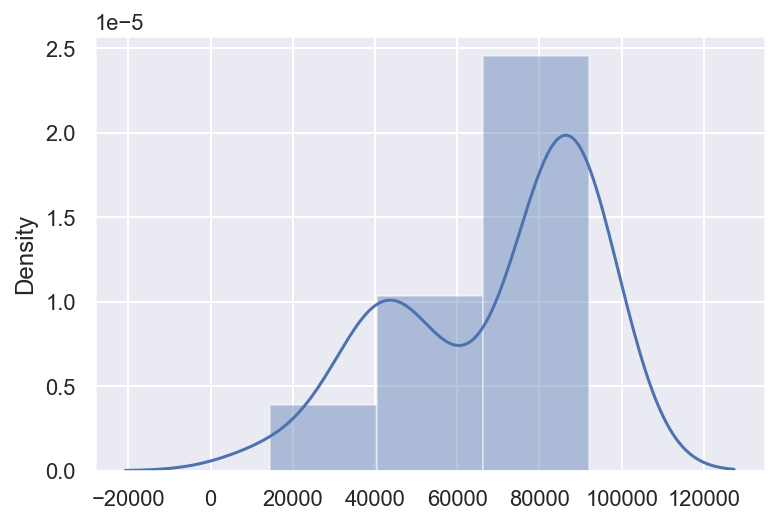

In [24]:
# 일별 승차하는 승객수 분포
sns.distplot(psng_per_day)

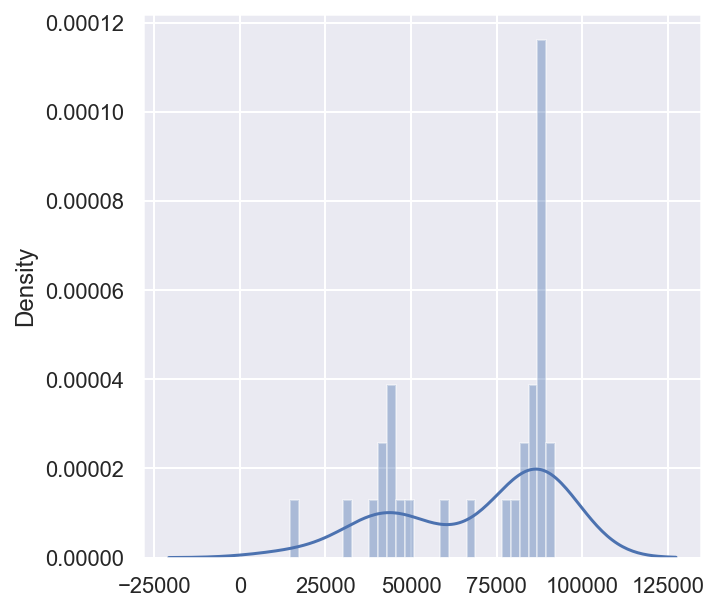

In [40]:
# 일자별 정차한 역 갯수 히스토그램
plt.figure(figsize=(5,5))
sns.distplot(psng_per_day,bins=30,kde=True)
plt.show()

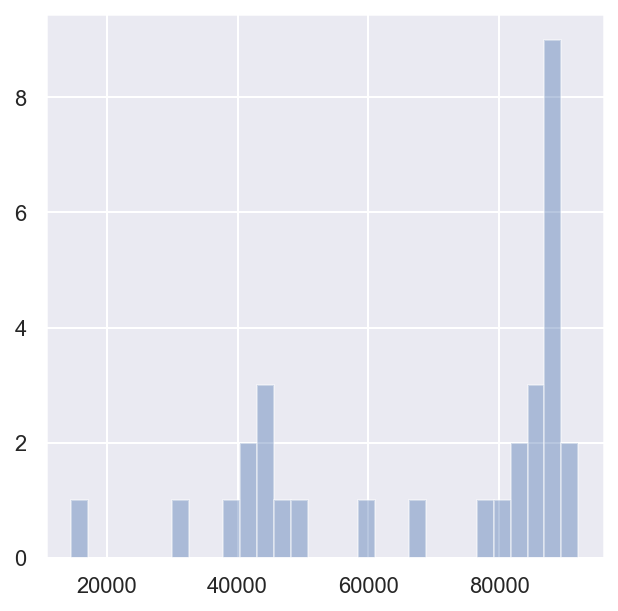

In [41]:
# 일자별 정차한 역 갯수 히스토그램
plt.figure(figsize=(5,5))
sns.distplot(psng_per_day,bins=30,kde=False)
plt.show()

<AxesSubplot:xlabel='total', ylabel='Count'>

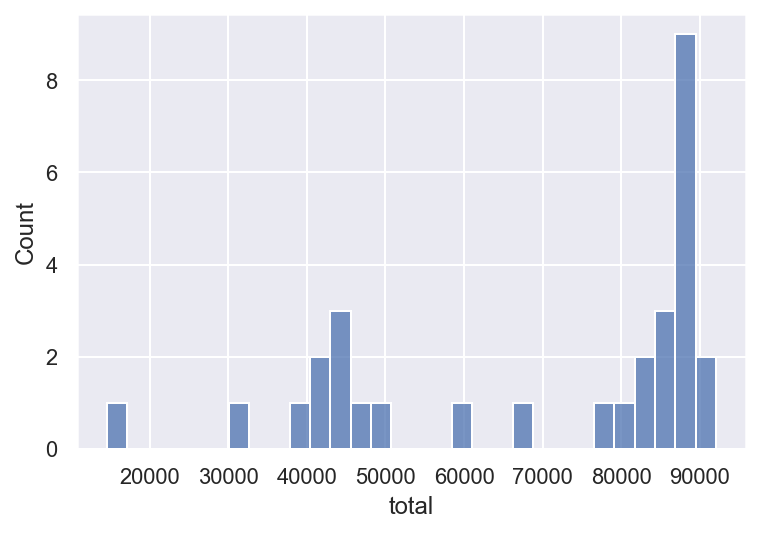

In [44]:
sns.histplot(psng_per_day['total'], bins=30, color='b')

In [45]:
psng_per_day.describe()

,total
count,30.000000
mean,69438.266667
std,23225.876807
min,14561.000000
25%,44811.250000
50%,83122.500000
75%,88783.500000
max,92050.000000


<AxesSubplot:ylabel='total'>

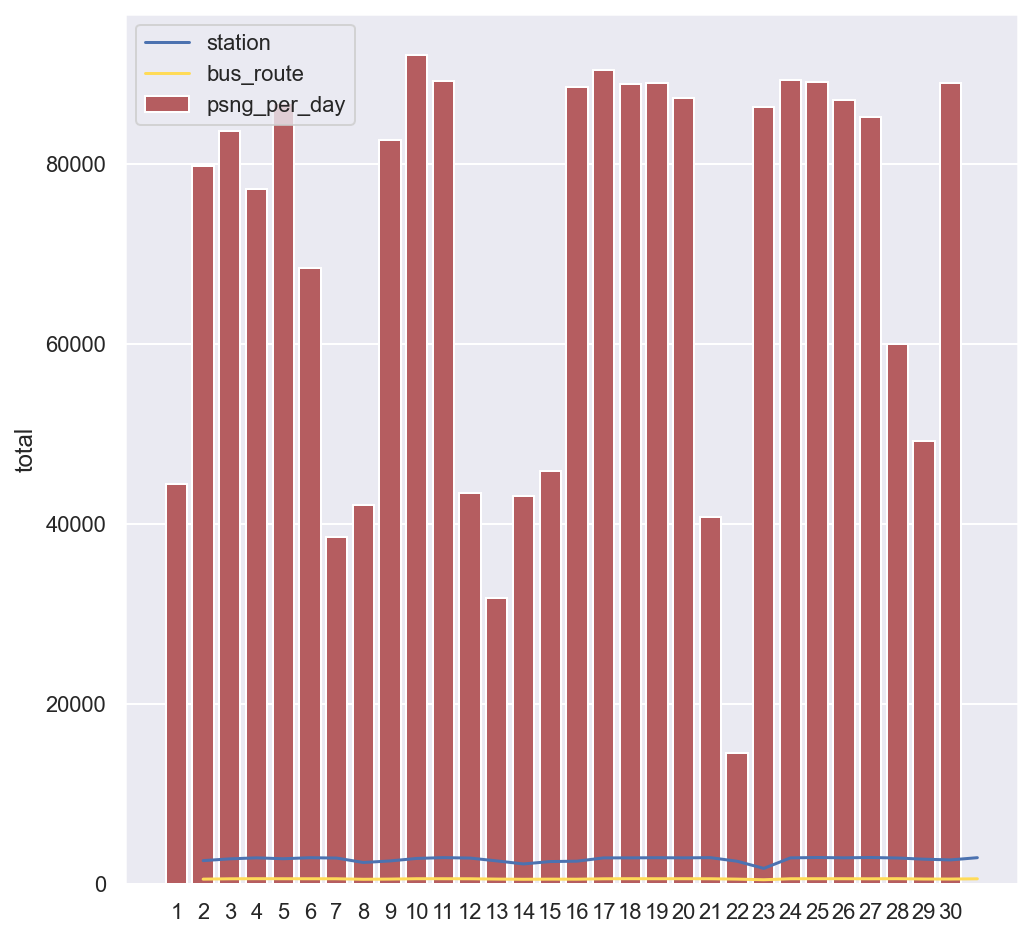

In [25]:
# 일자별 station, bus_route, passenger수 비교
f, ax = plt.subplots(figsize=(8,8))
sns.barplot(x=psng_per_day.index, y='total', data=psng_per_day, label='psng_per_day', color='r')
sns.lineplot(data=station_only["station"], label='station', color='b')
sns.lineplot(data=bus_route_only["bus_route"], label='bus_route', color='#ffdb58')
# sns.barplot(x=station_only.index, y='station', data=station_only, label='station', color='b')
# sns.barplot(x=bus_route_only.index, y='bus_route', data=bus_route_only, label='bus_route', color='#ffdb58')

#### 바로 위 bar plot에 3가지 변수를 모두 다 넣었더니, 수치가 달라서 가독성이 떨어짐.
####  다른 방법이 필요함

In [43]:
df_concat = pd.concat([psng_per_day, station_only, bus_route_only], axis=1)
df_concat

,total,station,bus_route
1,44459,2552,496
2,79737,2750,534
3,83607,2862,545
4,77190,2762,540
5,86720,2877,538
6,68390,2838,537
7,38475,2346,480
8,42113,2518,502
9,82638,2797,542
10,92050,2886,541


In [44]:
X_train_over = df_concat

from sklearn.preprocessing import MinMaxScaler
# X_train 먼저 fit후 trasnform
scaler = MinMaxScaler().fit(X_train_over)
X_train_over = scaler.transform(X_train_over)

In [63]:
X_train_over = pd.DataFrame(X_train_over, columns=['total','station','bus_route'], index=range(1,31))
X_train_over

,total,station,bus_route
1,0.841100,0.875310,0.897436
2,0.891043,0.967795,0.991453
3,0.808231,0.885219,0.948718
4,0.931216,0.980182,0.931624
5,0.694666,0.947977,0.923077
6,0.308612,0.541701,0.435897
7,0.355560,0.683732,0.623932
8,0.878538,0.914121,0.965812
9,1.000000,0.987614,0.957265
10,0.962717,0.947977,0.923077


<AxesSubplot:>

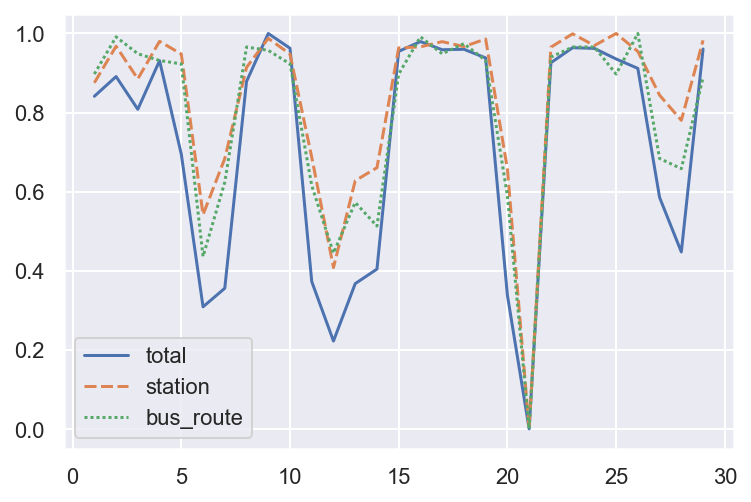

In [64]:
sns.lineplot(data=X_train_over)

25일(수요일)에만 승객수가 노선수를 초과함.
- 승객수는 다른날과 변함이 그닥 없는데,
- 정차한 정류소 갯수도 변함이 그닥 없는데,
- 운항한 노선 갯수만 줄어든 이유? 
    - 승객수에 변동이 없었던것으로 보아, 줄어든 노선 자체는 평소에도 승객 이용수가 낮은 곳이였을 것으로 보인다.
        - 승객수가 작던 곳에 노선을 줄인 것에 대해서는 딥한 분석 X

#### riding data가 가장 많았던 날은 월요일, 가장 적었던 날은 일요일이였다.